In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading csv file data set
titanic_info=pd.read_csv('c:/Users/Mahesh/Downloads/titanic.csv')
titanic_info

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


<AxesSubplot:xlabel='Survived', ylabel='count'>

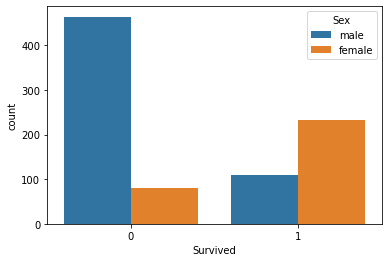

In [3]:
#countplot for suvived and sex
sns.countplot(x='Survived',hue='Sex',data=titanic_info)

In [4]:
#checking if any null values are present in dataset
titanic_info.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

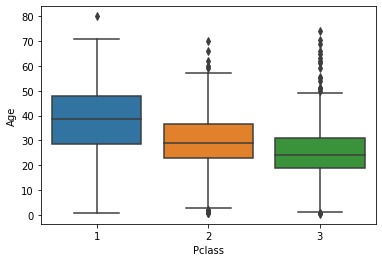

In [5]:
#boxplot for Pclass and Age 
sns.boxplot(x='Pclass',y='Age',data=titanic_info)

<AxesSubplot:>

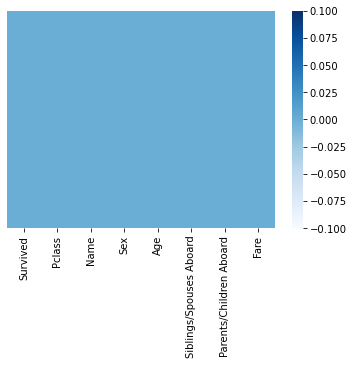

In [6]:
#heatmap to check null values if any
sns.heatmap(titanic_info.isnull(),yticklabels=False,cmap='Blues')

In [7]:
# converting sex column into binary i.e., 0 for male and 1 for female for easy understanding
sex=pd.get_dummies(titanic_info['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [8]:
#converting pclass column into categorical
pclass=pd.get_dummies(titanic_info['Pclass'],drop_first=True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [10]:
#adding the updated columns to the data set
titanic_info=pd.concat([titanic_info,sex,pclass],axis=1)
titanic_info.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0,0,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,0,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0,0,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,0,1


In [12]:
#dropping old columns as we have already updated them
titanic_info.drop(['Pclass','Sex','Name'],axis=1,inplace=True)
titanic_info

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
882,0,27.0,0,0,13.0000,1,1,0
883,1,19.0,0,0,30.0000,0,0,0
884,0,7.0,1,2,23.4500,0,0,1
885,1,26.0,0,0,30.0000,1,0,0


In [14]:
#importing the ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [17]:
#choosing dependent and indepent variables and assigning 
X=titanic_info[['male']]
Y=titanic_info[['Survived']]

In [18]:
#splitting the data into train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)


In [20]:
#creating variable for logistic regression
logistic_model=LogisticRegression()

In [21]:
#fitting the model
logistic_model.fit(X_train,Y_train)

C:\Users\Mahesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [22]:
#prediction value from the model
prediction=logistic_model.predict(X_test)

In [31]:
#performing of model classification report
from sklearn.metrics import classification_report
classification_report(Y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.81      0.82      0.82       162\n           1       0.72      0.70      0.71       105\n\n    accuracy                           0.78       267\n   macro avg       0.76      0.76      0.76       267\nweighted avg       0.77      0.78      0.77       267\n'

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,prediction)

array([[133,  29],
       [ 31,  74]], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,prediction)

0.7752808988764045

In [ ]:
CONCLUSION:
our model as accuracy of 0.77 i.e, around 80% we conclude which is a good model